# EE 379K Lab 4

## Rohan Nagar and Wenyang Fu

In [5]:
import numpy as np
import scipy as sp
import sympy
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Problem 1: Linear Algebra in Python

## Part 1

Consider the linear subspace $S = span\{v_1, v_2, v_3, v_4\}$ where $v_1 = [1, 2, 3, 4]$, $v_2 = [0, 1, 0, 1]$, $v_3 = [1, 4, 3, 6]$, $v_4 = [2, 11, 6, 15]$. Create a vector inside $S$ different from $v_1, v_2, v_3, v_4$. Create a vector not in $S$. How would you check if a new vector is in $S$?

In [6]:
v1 = np.array([1, 2, 3, 4])
v2 = np.array([0, 1, 0, 1])
v3 = np.array([1, 4, 3, 6])
v4 = np.array([2, 11, 6, 15])
mat = np.vstack((v1, v2, v3, v4))
reduced = sympy.Matrix(mat).rref()
print(reduced)

(Matrix([
[1.0,   0, 3.0, 2.0],
[  0, 1.0,   0, 1.0],
[  0,   0,   0,   0],
[  0,   0,   0,   0]]), [0, 1])


### Vector is contained in $S$

In [7]:
vec_in_s = np.array([2, 4, 6, 8])
mat1 = np.vstack((mat, vec_in_s))
reduced = sympy.Matrix(mat1).rref()
reduced

(Matrix([
 [1.0,   0, 3.0, 2.0],
 [  0, 1.0,   0, 1.0],
 [  0,   0,   0,   0],
 [  0,   0,   0,   0],
 [  0,   0,   0,   0]]), [0, 1])

We can see that it is contained in $S$ because the linear subspace remains the same when reduced.

### Vector not contained in $S$

In [8]:
vec_not_in_s = np.array([1, 1, 3, 4])
mat2 = np.vstack((mat, vec_not_in_s))
reduced = sympy.Matrix(mat2).rref()
reduced

(Matrix([
 [1.0,   0, 3.0,   0],
 [  0, 1.0,   0,   0],
 [  0,   0,   0, 1.0],
 [  0,   0,   0,   0],
 [  0,   0,   0,   0]]), [0, 1, 3])

The linear subspace when reduced is not the same, so we can see that our new vector is not in $S$.

### How would you check if a new vector is in $S$?

A: If a new vector is in $S$, then it must be expressable as a linear combination of the existing vectors in $S$.

## Part 2

Find the dimension of the subspace $S$.

A: The dimension of the subspace is 2.

In [9]:
mat = np.vstack((v1, v2, v3, v4))
reduced = sympy.Matrix(mat).rref()
s = np.array(reduced[0].tolist())  # Convert sympy matrix back to np.ndarray
s = s[~np.all(s == 0, axis=1)] # Drop non-linearly independent vectors
s = s.astype(np.float64) # Typecast sympy floats back into numpy floats
print(s)
print('Rank: {}'.format(s.shape[0]))
rank = s.shape[0]

[[ 1.  0.  3.  2.]
 [ 0.  1.  0.  1.]]
Rank: 2


## Part 3

Find an orthonormal basis for the subspace S.

A: The QR decomposition provides an easy way to find an orthornomal basis for the subspace S. The first $n$ columns of $Q$ (where $n = rank(span(S))$) constitute an orthonormal basis of $S$.

In [13]:
# Help from here:
# https://stackoverflow.com/questions/27176453/scipy-find-bases-of-column-space-of-matrix

q,r = np.linalg.qr(mat.T) # Transpose matrix to find column basis as opposed to row basis
print(q)
print(r)
orthonormal_basis = q[:, :rank]
print('\nOrthonormal Basis:\n{}'.format(orthonormal_basis))

[[-0.18257419  0.2236068   0.91610405  0.27824457]
 [-0.36514837 -0.67082039  0.26916143 -0.58670162]
 [-0.54772256  0.67082039 -0.12592707 -0.4838826 ]
 [-0.73029674 -0.2236068  -0.26916143  0.58670162]]
[[ -5.47722558e+00  -1.09544512e+00  -7.66811581e+00  -1.86225670e+01]
 [  0.00000000e+00  -8.94427191e-01  -1.78885438e+00  -6.26099034e+00]
 [  0.00000000e+00   0.00000000e+00  -4.00296604e-16   1.47801823e-15]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   6.15840930e-16]]

Orthonormal Basis:
[[-0.18257419  0.2236068 ]
 [-0.36514837 -0.67082039]
 [-0.54772256  0.67082039]
 [-0.73029674 -0.2236068 ]]


## Part 4

Solve the optimization problem $min_{x \in S}\| x - z^* \|_2$ where $z^* = [1, 0, 0, 0]$

In [14]:
# TODO

# Problem 2: PCA

## Part 1



/Users/rohannagar/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


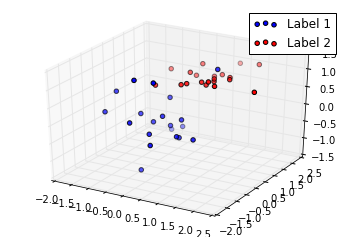

In [15]:
# Covariance matrices
cov1 = [[0.5, 0, 0],
        [0, 0.5, 0],
        [0, 0, 0.7]]
cov2 = [[0.5, 0, 0],
        [0, 0.5, 0],
        [0, 0, 0.01]]

# Generate the samples
label1_samples = np.random.multivariate_normal([0, 0, 0], cov1, 20)
label2_samples = np.random.multivariate_normal([1, 1, 1], cov2, 20)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(label1_samples.T[0], label1_samples.T[1], label1_samples.T[2], label='Label 1')
ax.scatter(label2_samples.T[0], label2_samples.T[1], label2_samples.T[2], c='r', label='Label 2')
ax.legend()
fig.show()

## Part 2

What do the points look like?

#### The label 1 points are labled in blue above. These points are more spread out and they go much lower in the $z$ direction than the label 2 points. It is also generally lower in value in the $x$ direction than the label 2 points. The label 2 points are more compact and closer together. They form more of an ellipsoid shape than the label 1 points.

## Part 3

In [16]:
def covariance(X, Y):
    ''' 
    Finds the covariance of the two arrays X and Y.
    X and Y must be the same length.
    '''
    if len(X) is not len(Y):
        return None
    
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    
    total = 0
    for x, y in zip(X, Y):
        total += (x-X_mean)*(y-Y_mean)
        
    return total / (len(X) - 1)

# Concatenate
samples = label1_samples + label2_samples

# Calculate the covariance matrix
cov = [[covariance(col, col2) for col2 in samples.T] for col in samples.T]
print(np.array(cov))

[[ 0.83029334 -0.24045991  0.27167596]
 [-0.24045991  1.36663381 -0.0415013 ]
 [ 0.27167596 -0.0415013   0.51178685]]


## Part 4

In [38]:
def largest_eigenvectors(cov):
    values, vectors = np.linalg.eig(cov)
    
    largest = max(values)
    second_largest = max(np.delete(values, np.nonzero(values==largest)[0][0]))

    first_vector = vectors[:,np.nonzero(values==largest)[0][0]]
    second_vector = vectors[:,np.nonzero(values==second_largest)[0][0]]
    
    return first_vector, second_vector
    

def normalize(x):
    return [x[i] / np.linalg.norm(x) for i in range(len(x))]


def project_onto_plane(x, n):
    d = np.dot(x, n) / np.linalg.norm(n)
    p = [d * normalize(n)[i] for i in range(len(n))]
    return [x[i] - p[i] for i in range(len(x))]
    
eigenvectors = largest_eigenvectors(cov)

# TODO: project label1_samples and label2_samples onto the two eigenvectors and plot with labels
print(eigenvectors[0])
print(label1_samples)
projected1 = [project_onto_plane(sample, eigenvectors[0]) for sample in label1_samples]
print(np.array(projected1))

[-0.39824745  0.90482615 -0.15062739]
[[ 0.51467002 -0.20957904 -0.44140681]
 [-0.05929236  0.35232027 -0.39376214]
 [ 1.14485017 -0.61923495 -0.23418196]
 [-0.33726644  0.81180732  0.21641155]
 [-1.33452819 -0.68261467  0.10316501]
 [ 0.11573181 -0.97896458 -0.15496652]
 [-0.85663824  1.77425324 -1.14560492]
 [-0.64297025 -0.11177148 -0.0035293 ]
 [-0.16142087 -0.93010498 -1.26330256]
 [ 0.21185708 -0.91565324  1.26558745]
 [ 0.89917344  1.02343988  1.1632833 ]
 [-0.29357934 -0.97206414  1.26606072]
 [-0.30413748 -0.06998667 -0.19095306]
 [-0.34617061  1.46541968 -0.85708417]
 [-1.32306616 -0.14634176  0.5175185 ]
 [ 0.70187944 -0.66022625 -0.21987592]
 [-0.26177519 -1.2676057   0.18892736]
 [ 0.4524778  -1.50061047 -0.22551389]
 [ 0.40476076  0.10042009 -0.05591463]
 [ 0.0599563  -0.23808768  0.09471951]]
[[ 0.38400079  0.08730407 -0.49082927]
 [ 0.10068881 -0.01116015 -0.33325316]
 [ 0.75418559  0.26836278 -0.38194132]
 [-0.00422704  0.05513516  0.34237558]
 [-1.37503578 -0.59058061

Did PCA make it easier to distingush the two labels in two dimensions?

#### TODO: Answer here.

# Problem 3: Low Rank Approximation

## Part 1

Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a SVD on this matrix using $\tt{linalg.svd}$. You can perform a low-rank approximation by zeroing out singular values and keeping only the top $k$. Show the best rank for $k = 2$, $k = 5$, and $k = 10$ approximation to Mona Lisa.

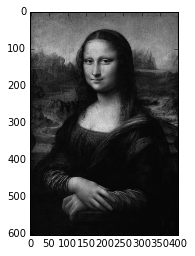

In [18]:
# Load the image
M = mpimg.imread('mona_lisa.png')
plt.imshow(M)

In [19]:
u, s, v = np.linalg.svd(M)

print(M.shape)
print(u.shape)
print(s.shape)
print(v.shape)
print(M[0:2])

(603, 400, 4)
(603, 400, 400)
(603, 4)
(603, 4, 4)
[[[ 0.08627451  0.08627451  0.08627451  0.93725491]
  [ 0.26666668  0.26666668  0.26666668  0.97254902]
  [ 0.26666668  0.26666668  0.26666668  0.96862745]
  ..., 
  [ 0.29019609  0.29019609  0.29019609  0.96862745]
  [ 0.3019608   0.3019608   0.3019608   0.97254902]
  [ 0.30588236  0.30588236  0.30588236  0.93725491]]

 [[ 0.08627451  0.08627451  0.08627451  0.96862745]
  [ 0.24705882  0.24705882  0.24705882  1.        ]
  [ 0.24313726  0.24313726  0.24313726  1.        ]
  ..., 
  [ 0.30980393  0.30980393  0.30980393  1.        ]
  [ 0.3019608   0.3019608   0.3019608   1.        ]
  [ 0.32549021  0.32549021  0.32549021  0.96862745]]]


### Rank 2 Approximiation

[[  2.27120991e+01   1.06662595e+00   1.61069939e-14   1.70096985e-18]
 [  2.33366299e+01   1.03104186e+00   7.17200076e-15   1.37810234e-17]
 [  2.33624191e+01   9.12025273e-01   8.76332918e-15   1.96378732e-17]
 ..., 
 [  2.00422554e+01   2.79746920e-01   1.39326321e-15   6.37415402e-19]
 [  2.00434513e+01   2.96440154e-01   8.26491710e-16   8.39426634e-20]
 [  1.94197788e+01   2.87993133e-01   2.63605314e-15   8.86271087e-18]]
(603, 4)
(603, 4, 4)
[[[ 22.71209908   0.           0.           0.        ]
  [  0.           1.06662595   0.           0.        ]
  [  0.           0.           0.           0.        ]
  ..., 
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]]

 [[ 23.33662987   0.           0.           0.        ]
  [  0.           1.03104186   0.           0.        ]
  [  0.           0.           0.           0.        ]
  ..., 
  [  0.           0.   

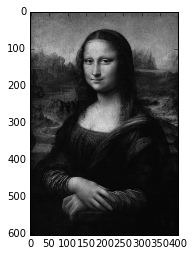

In [20]:
# Got inspiration from here:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

print(s)
s_rank2 = np.copy(s)
s_rank2[:, 2:] = 0
print(s_rank2.shape)

S = np.zeros(M.shape)
result = np.array([np.diag(row) for row in s_rank2])
print(result.shape)
S[:, :4, :4] = result
print(S)
rank2_approx = u @ S @ v
plt.imshow(rank2_approx)

# Rank 5 Approximiation

[[[  2.27120991e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   1.06662595e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   1.61069939e-14   0.00000000e+00]
  ..., 
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]

 [[  2.33366299e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   1.03104186e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   7.17200076e-15   0.00000000e+00]
  ..., 
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]

 [[  2.33624191e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   9.12025273e-01   0.000

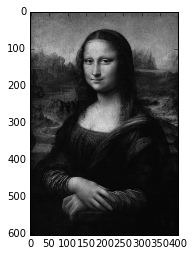

In [21]:
s_rank5 = np.copy(s)
s_rank5[:, 5:] = 0

S = np.zeros(M.shape)
result = np.array([np.diag(row) for row in s_rank5])
S[:, :4, :4] = result
print(S)
rank5_approx = u @ S @ v
plt.imshow(rank5_approx)

# Rank 10 Approximiation

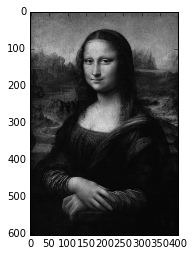

In [22]:
s_rank10 = np.copy(s)
s_rank10[:, 10:] = 0

S = np.zeros(M.shape)
result = np.array([np.diag(row) for row in s_rank10])
S[:, :4, :4] = result
rank10_approx = u @ S @ v
plt.imshow(rank10_approx)

## Part 2

If each pixel is represented by two bytes, how many bits is your compressed Mona Lisa for each of those $k$ rank approximations?

A: 2-rank: 603 x 400 x 4 x 16 / 

# Problem 4: Kaggle

## Part 1

Make an account on Kaggle and find https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

# Part 2

Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models. Then run a ridge regression using $\alpha = 0.1$. Make a submission of this prediciton, what is the RSME you get? (Hint: remember to exponentiate $\tt{np.expm1(ypred)}$ your predicitons).

In [23]:
import pandas as pd
from scipy.stats import skew

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

### Preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110822080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1112d1208>]], dtype=object)

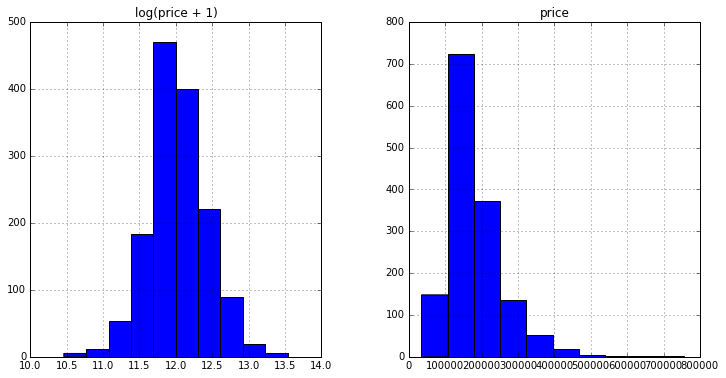

In [25]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [26]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

In [27]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [28]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

### Run our Ridge model

In [29]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1).fit(X_train, y)
preds = np.expm1(model.predict(X_test))

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("solution.csv", index = False)

With $\alpha = 0.1$, the Ridge predictions submitted on Kaggle gave a score of $0.13029$.

## Part 3

Try to build the best model you can. Report the best RSME you got on the Kaggle wall and how you got it.